## Trending analysis of music preferences

#### Import library and package

In [3]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from matplotlib.figure import Figure 
from wordcloud import WordCloud

#### Load data

In [4]:
df_normal  = pd.read_csv('list_info.csv') # Load các thông tin các video về âm nhạc thường
df_normal.head()


,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,XIUI1h4I7RI,2022-06-27T01:00:06Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...",10,vi,PT1H20M,2d,...,False,public,True,False,82968,NaN,NaN,0,52.0,['https://en.wikipedia.org/wiki/Electronic_mus...
1,JI-9dc-J1RU,2022-06-26T08:00:30Z,Nhạc Trẻ Ballad Việt Hay Nhất 2022 | Lk Nhạc T...,Nhạc Trẻ Ballad Việt Hay Nhất 2022 | Lk Nhạc T...,ACV Ballad,"['acv', 'acv ballad', 'nhạc trẻ', 'nhac tre', ...",22,NaN,PT1H32M45S,2d,...,False,public,True,False,48251,NaN,NaN,0,6.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
2,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv trending', 'acv', 'nhac tre moi nhat', '...",10,vi,PT1H38M44S,2d,...,False,public,True,False,10817,NaN,NaN,0,3.0,['https://en.wikipedia.org/wiki/Music']
3,GZF7MC7JSHk,2022-06-27T10:00:08Z,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,Orinn Remix,"['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...",10,vi,PT1H9M6S,2d,...,False,public,True,False,9598,NaN,NaN,0,45.0,['https://en.wikipedia.org/wiki/Electronic_mus...
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển tập nhạc trẻ', 'nhạc trẻ hay nhất', 'n...",10,vi,PT2H57M15S,2d,...,True,public,True,False,170665,674.0,NaN,0,18.0,"['https://en.wikipedia.org/wiki/Music', 'https..."


In [5]:
# Xem thông tin tổng quan về data frame
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1293 non-null   object 
 1   publishAt             1293 non-null   object 
 2   title                 1293 non-null   object 
 3   description           1245 non-null   object 
 4   channelTitle          1293 non-null   object 
 5   tags                  1152 non-null   object 
 6   categoryId            1293 non-null   int64  
 7   defaultAudioLanguage  755 non-null    object 
 8   duration              1293 non-null   object 
 9   dimension             1293 non-null   object 
 10  definition            1293 non-null   object 
 11  caption               1293 non-null   bool   
 12  privacyStatus         1293 non-null   object 
 13  embeddable            1293 non-null   bool   
 14  madeForKids           1293 non-null   bool   
 15  viewCount            

In [6]:
# Lọc ra các video âm nhạc tức categoryId là 10 - Music
df_normal = df_normal[df_normal['categoryId']==10]

In [7]:
# Xử lý các giá trị null trong data frame
df_normal_preprocessed = df_normal.fillna({'description':'', 'tags':'', 'defaultAudioLanguage':'', 'likeCount':0, 'dislikeCount':0, 'commentCount':0, 'topicCategories':'' })
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,XIUI1h4I7RI,2022-06-27T01:00:06Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...",10,vi,PT1H20M,2d,...,False,public,True,False,82968,0.0,0.0,0,52.0,['https://en.wikipedia.org/wiki/Electronic_mus...
2,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv trending', 'acv', 'nhac tre moi nhat', '...",10,vi,PT1H38M44S,2d,...,False,public,True,False,10817,0.0,0.0,0,3.0,['https://en.wikipedia.org/wiki/Music']
3,GZF7MC7JSHk,2022-06-27T10:00:08Z,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,Orinn Remix,"['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...",10,vi,PT1H9M6S,2d,...,False,public,True,False,9598,0.0,0.0,0,45.0,['https://en.wikipedia.org/wiki/Electronic_mus...
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển tập nhạc trẻ', 'nhạc trẻ hay nhất', 'n...",10,vi,PT2H57M15S,2d,...,True,public,True,False,170665,674.0,0.0,0,18.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
5,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say thì cứ say yêu thì bỏ đi', 'Liên Khúc Nh...",10,,PT2H15M17S,2d,...,False,public,True,False,1194748,4379.0,0.0,0,79.0,['https://en.wikipedia.org/wiki/Electronic_mus...


In [8]:
# Mô tả các thuộc tính có giá trị nguyên
df_normal.describe()

,categoryId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
count,808.0,8.080000e+02,5.810000e+02,0.0,808.0,8.050000e+02
mean,10.0,5.356602e+06,1.981143e+05,NaN,0.0,1.607789e+04
std,0.0,3.223374e+07,1.218171e+06,NaN,0.0,1.855491e+05
min,10.0,0.000000e+00,0.000000e+00,NaN,0.0,0.000000e+00
25%,10.0,6.976975e+04,9.580000e+02,NaN,0.0,1.500000e+01
50%,10.0,2.231025e+05,4.222000e+03,NaN,0.0,5.100000e+01
75%,10.0,1.197953e+06,2.150100e+04,NaN,0.0,2.580000e+02
max,10.0,5.058488e+08,1.661966e+07,NaN,0.0,3.511369e+06


In [11]:
# Draw a statistical pie chart according to the number of views of the videos
def pieCharViewCounts(df):
    listVideo_10KView = df[df['viewCount']<100000]['id']
    listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
    listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
    listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
    listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']

    y = np.array([len(listVideo_10KView),
                    len(listVideo_100KView),
                    len(listVideo_1MView),
                    len(listVideo_10MView),
                    len(listVideo_100MView),
                ])
    mylabel = ['Video 10 thousand views', 'Video 100 thousand views', 'Video million views', 'Video 10 million views', 'Video 100 million views']
   
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.pie(y, labels=mylabel)
    plt.show()

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


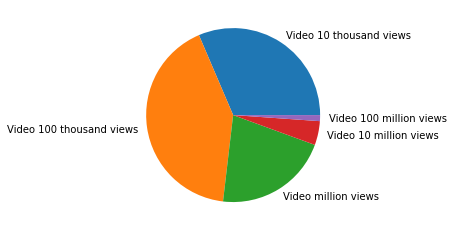

In [12]:
pieCharViewCounts(df_normal)

#### Xử lý tag và tên channel (thêm "_" vào các tag)


In [13]:
df_normal_preprocessed['tags'].fillna('', inplace=True)

In [14]:
def removeSpace(listItems, noise):
    tagsPreprocessed = []
    for item in listItems:
        if item == noise:
            tagsPreprocessed.append(item)
            continue
        item = item.replace(' ','_')
        item = item.replace(',_',', ')
        tagsPreprocessed.append(item)
    # print(tagsPreprocessed)
    return tagsPreprocessed

In [15]:
print(df_normal_preprocessed['tags'])
tagsPreprocessed = removeSpace(df_normal_preprocessed['tags'], ' ')
# df_normal_preprocessed.drop(columns=['tags'])
# df_normal_preprocessed.assign(tags = tagsPreprocessed)
# print(df_normal_preprocessed['tags'])
# print(tagsPreprocessed)
df_normal_preprocessed['tags'] = tagsPreprocessed

0       ['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...
2       ['acv trending', 'acv', 'nhac tre moi nhat', '...
3       ['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...
4       ['tuyển tập nhạc trẻ', 'nhạc trẻ hay nhất', 'n...
5       ['Say thì cứ say yêu thì bỏ đi', 'Liên Khúc Nh...
                              ...                        
1286    ['xin má rước dâu', 'xin má rước dâu lofi', 'x...
1288    ['min xinh', 'duyen duyen so so', 'duyên duyên...
1289    ['nhạc chill tiktok', 'nhac chill tiktok', 'nh...
1291    ['music', 'đám cưới miền tây', 'Music', 'đám c...
1292    ['DaBaby', 'Baby Jesus', 'Charlotte', 'Hip Hop...
Name: tags, Length: 808, dtype: object


#### Handling topic categories

In [16]:
df_normal_preprocessed['topicCategories'] = df_normal['topicCategories'].fillna('')

In [17]:
listTopics=[]
for index, row in df_normal_preprocessed.iterrows():
    listTopic = row['topicCategories']
    if listTopic == '':
        listTopics.append(listTopic)
        continue
    topicStr = ''
    listTopic = listTopic.replace('https://en.wikipedia.org/wiki/','')
    listTopic = listTopic.replace("'Music'",'')
    listTopic = listTopic.replace(',','')
    listTopic = listTopic.replace('[','')
    listTopic = listTopic.replace(']','')
    listTopic = listTopic.replace('\'','')
    print(listTopic)
    listTopics.append(listTopic)
    #     #topic = topic.removesuffix("https://en.wikipedia.org/wiki/")
    #     print(topic)

print(type(listTopics))

Electronic_music 

Electronic_music  Pop_music
 Music_of_Asia Pop_music
Electronic_music  Pop_music
 Pop_music

Electronic_music  Pop_music
Classical_music Electronic_music 
Electronic_music  Pop_music
 Pop_music
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music 
Electronic_music 
 Music_of_Asia
Electronic_music  Pop_music
Electronic_music  Music_of_Asia
Electronic_music  Pop_music
Electronic_music  Pop_music

Electronic_music 
Electronic_music  Pop_music

Electronic_music 

Classical_music  Pop_music
Electronic_music 
Electronic_music 
 Pop_music
Electronic_music  Pop_music
Electronic_music 
Electronic_music 
Electronic_music  Pop_music

Electronic_music  Music_of_Asia Pop_music
Electronic_music  Pop_music
Electronic_music  Pop_music

Electronic_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
 Pop_music
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music

In [18]:
df_normal_preprocessed['topicCategories'] = listTopics
df_normal_preprocessed

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,XIUI1h4I7RI,2022-06-27T01:00:06Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H20M,2d,...,False,public,True,False,82968,0.0,0.0,0,52.0,Electronic_music
2,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H38M44S,2d,...,False,public,True,False,10817,0.0,0.0,0,3.0,
3,GZF7MC7JSHk,2022-06-27T10:00:08Z,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H9M6S,2d,...,False,public,True,False,9598,0.0,0.0,0,45.0,Electronic_music Pop_music
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,True,public,True,False,170665,674.0,0.0,0,18.0,Music_of_Asia Pop_music
5,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say_thì_cứ_say_yêu_thì_bỏ_đi', 'Liên_Khúc_Nh...",10,,PT2H15M17S,2d,...,False,public,True,False,1194748,4379.0,0.0,0,79.0,Electronic_music Pop_music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,lf1mzxyZwuA,2022-06-26T23:00:27Z,"Nhạc Lofi Chill TikTok 2022 ♫ Xin Má Rước Dâu,...","Nhạc Lofi Chill TikTok 2022 ♫ Xin Má Rước Dâu,...",Air Lofi Chill,"['xin_má_rước_dâu', 'xin_má_rước_dâu_lofi', 'x...",10,,PT1H1M41S,2d,...,False,public,True,False,11976,653.0,0.0,0,1.0,Electronic_music
1288,ryNbavTVaU8,2022-06-26T09:00:36Z,"Gặp Gỡ Để Chia Ly Chia Ly Để Gặp Gỡ Remix , Du...",Welcome To Min Xinh :\n\nGặp Gỡ Để Chia Ly Chi...,Min Xinh,"['min_xinh', 'duyen_duyen_so_so', 'duyên_duyên...",10,,PT1H19M5S,2d,...,False,public,True,False,36412,0.0,0.0,0,14.0,Electronic_music Pop_music
1289,28-xqHYligE,2022-06-25T11:00:01Z,Nhạc Chill TikTok - Nhạc Lofi Buồn Hot Nhất Hi...,Nhạc Chill TikTok - Nhạc Lofi Buồn Hot Nhất Hi...,Anten.,"['nhạc_chill_tiktok', 'nhac_chill_tiktok', 'nh...",10,,PT41M24S,2d,...,False,public,True,False,33851,0.0,0.0,0,20.0,Electronic_music Pop_music
1291,x7BX0FbUVjA,2022-06-26T10:06:45Z,"TUYỂN TẬP NHẠC ĐÁM CƯỚI MIỀN TÂY, CHỜ NGÀY CƯỚ...","TUYỂN TẬP NHẠC ĐÁM CƯỚI MIỀN TÂY, CHỜ NGÀY CƯỚ...",Nekko Remix,"['music', 'đám_cưới_miền_tây', 'Music', 'đám_c...",10,,PT35M48S,2d,...,False,public,True,False,36645,0.0,0.0,0,35.0,Electronic_music Pop_music


#### Handling time

In [19]:
def convertHour(str):
    if str.find('H') == -1:
        return 0
    hour = str.split('T')[1].split('H')[0]
    return hour

def convertMinute(str):
    if str.find('M') == -1:
        return 0
    if str.find('H') != -1:
        minute = str.split('H')[1].split('M')[0]
    else:
        minute = str.split('T')[1].split('M')[0]
    return minute

def convertSecond(str):
    if str.find('S') == -1:
        return 0
    if str.find('M') == -1:
        if str.find('H') == -1:
            second = str.split('T')[1].split('S')[0]
        else:    
            second = str.split('H')[1].split('S')[0]
    else:
        second = str.split('M')[1].split('S')[0]
    return second

In [20]:
hours, minutes, seconds = [], [], []
years, months, days = [], [], []
durationInt = []
for index, row in df_normal.iterrows():
    hours.append(int(convertHour(row['duration'])))
    minutes.append(int(convertMinute(row['duration'])))
    seconds.append(int(convertSecond(row['duration'])))
    years.append(int(row['publishAt'].split('-',1)[0]))
    months.append(int(row['publishAt'].split('-',1)[1].split('-',1)[0]))
    days.append(int(row['publishAt'].split('-',2)[2].split('T')[0]))
    durationInt.append(hours[-1]*60*60+minutes[-1]*60+seconds[-1])

In [21]:
df_normal_preprocessed = df_normal_preprocessed.assign(hourDuration=hours, minuteDuration=minutes, secondDuration=seconds, yearPublished=years, monthPublished=months, dayPublished=days, durationInt = durationInt)
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,favoriteCount,commentCount,topicCategories,hourDuration,minuteDuration,secondDuration,yearPublished,monthPublished,dayPublished,durationInt
0,XIUI1h4I7RI,2022-06-27T01:00:06Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H20M,2d,...,0,52.0,Electronic_music,1,20,0,2022,6,27,4800
2,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H38M44S,2d,...,0,3.0,,1,38,44,2022,6,27,5924
3,GZF7MC7JSHk,2022-06-27T10:00:08Z,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H9M6S,2d,...,0,45.0,Electronic_music Pop_music,1,9,6,2022,6,27,4146
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,0,18.0,Music_of_Asia Pop_music,2,57,15,2022,5,22,10635
5,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say_thì_cứ_say_yêu_thì_bỏ_đi', 'Liên_Khúc_Nh...",10,,PT2H15M17S,2d,...,0,79.0,Electronic_music Pop_music,2,15,17,2022,4,11,8117


#### Handling name of video

In [22]:
# Function to remove some interfering words
def removeStopword(texts, stopwords):
    tmpList = []
    for text in texts:
        text = text.lower()
        for stopword in stopwords:
            text = text.replace(stopword,'')
        tmpList.append(text)
    return tmpList

#### Process column values to integers

In [23]:
le_captions = preprocessing.LabelEncoder()
le_captions.fit(df_normal['caption'])
df_normal_preprocessed['caption'] = le_captions.transform(df_normal['caption'])

le_embeddables = preprocessing.LabelEncoder()
le_embeddables.fit(df_normal['embeddable'])
df_normal_preprocessed['embeddable'] = le_embeddables.transform(df_normal['embeddable'])

le_madeForKids = preprocessing.LabelEncoder()
le_madeForKids.fit(df_normal['madeForKids'])
df_normal_preprocessed['madeForKids'] = le_madeForKids.transform(df_normal['madeForKids'])

le_privacyStatus = preprocessing.LabelEncoder()
le_privacyStatus.fit(df_normal['privacyStatus'])
df_normal_preprocessed['privacyStatus'] = le_privacyStatus.transform(df_normal['privacyStatus'])

le_definitions = preprocessing.LabelEncoder()
le_definitions.fit(df_normal['definition'])
df_normal_preprocessed['definition'] = le_definitions.transform(df_normal['definition'])

In [24]:
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,favoriteCount,commentCount,topicCategories,hourDuration,minuteDuration,secondDuration,yearPublished,monthPublished,dayPublished,durationInt
0,XIUI1h4I7RI,2022-06-27T01:00:06Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H20M,2d,...,0,52.0,Electronic_music,1,20,0,2022,6,27,4800
2,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H38M44S,2d,...,0,3.0,,1,38,44,2022,6,27,5924
3,GZF7MC7JSHk,2022-06-27T10:00:08Z,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H9M6S,2d,...,0,45.0,Electronic_music Pop_music,1,9,6,2022,6,27,4146
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,0,18.0,Music_of_Asia Pop_music,2,57,15,2022,5,22,10635
5,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say_thì_cứ_say_yêu_thì_bỏ_đi', 'Liên_Khúc_Nh...",10,,PT2H15M17S,2d,...,0,79.0,Electronic_music Pop_music,2,15,17,2022,4,11,8117


##### Distribution of videos by number of views, like

(array([566.,   8.,   1.,   1.,   0.,   3.,   0.,   0.,   0.,   2.]),
 array([       0. ,  1661965.9,  3323931.8,  4985897.7,  6647863.6,
         8309829.5,  9971795.4, 11633761.3, 13295727.2, 14957693.1,
        16619659. ]),
 <BarContainer object of 10 artists>)

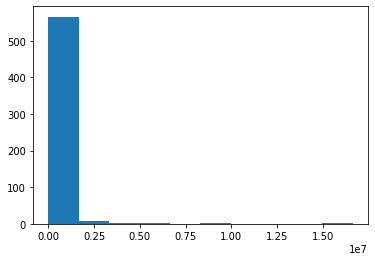

In [25]:
plt.hist(df_normal['likeCount'])

(array([386.,  44.,  24.,  16.,  12.,  10.,  11.,   8.,   1.,   4.]),
 array([    0. ,  9905.7, 19811.4, 29717.1, 39622.8, 49528.5, 59434.2,
        69339.9, 79245.6, 89151.3, 99057. ]),
 <BarContainer object of 10 artists>)

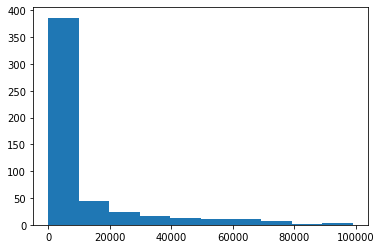

In [26]:
plt.hist(df_normal[df_normal['likeCount']<1e5]['likeCount'])

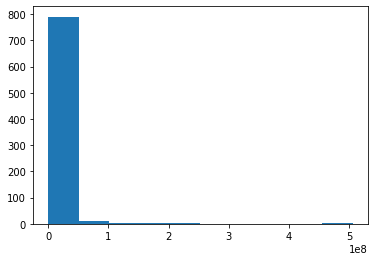

In [27]:
plt.hist(df_normal['viewCount']);

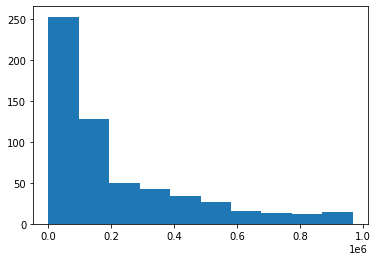

In [28]:
plt.hist(df_normal[df_normal['viewCount']<1e6]['viewCount']);

(array([349., 394.,  51.,  10.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([    0. ,  3664.6,  7329.2, 10993.8, 14658.4, 18323. , 21987.6,
        25652.2, 29316.8, 32981.4, 36646. ]),
 <BarContainer object of 10 artists>)

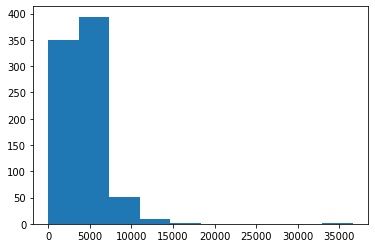

In [29]:
plt.hist(df_normal_preprocessed['durationInt'])

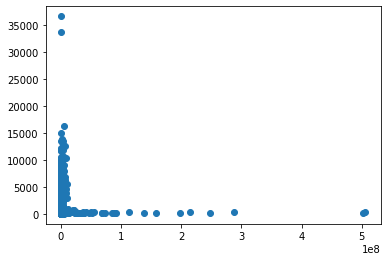

In [30]:
plt.scatter(df_normal_preprocessed['viewCount'], df_normal_preprocessed['durationInt'])

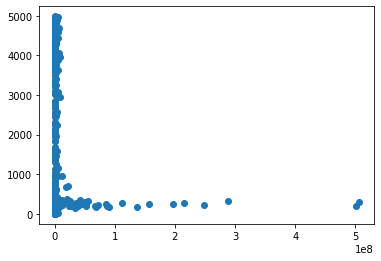

In [31]:
plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['durationInt'])

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/1613510240.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])


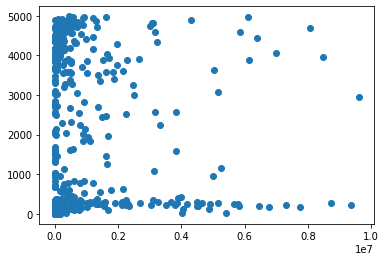

In [32]:

plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])

##### The relationship between attributes

In [33]:
corr = df_normal_preprocessed.corr()
print(df_normal_preprocessed.head(5))

            id             publishAt  \
0  XIUI1h4I7RI  2022-06-27T01:00:06Z   
2  _7UyRLB1HVg  2022-06-27T09:33:26Z   
3  GZF7MC7JSHk  2022-06-27T10:00:08Z   
4  yJFTFdgH5Bc  2022-05-22T03:00:18Z   
5  5BQKXF56e8A  2022-04-11T12:00:03Z   

                                               title  \
0  NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...   
2  Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...   
3  EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...   
4  TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...   
5  Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...   

                                         description        channelTitle  \
0  NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...         Orinn Remix   
2  Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...  ACV Music Trending   
3  EDM TikTok Hay 2022 - BXH Nhạc Trẻ Remix Hay N...         Orinn Remix   
4  TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...  TPT Music For Life   
5  Say thì cứ say yêu thì bỏ đi - Liên Khú

In [34]:
df_normal_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 1292
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    808 non-null    object 
 1   publishAt             808 non-null    object 
 2   title                 808 non-null    object 
 3   description           808 non-null    object 
 4   channelTitle          808 non-null    object 
 5   tags                  808 non-null    object 
 6   categoryId            808 non-null    int64  
 7   defaultAudioLanguage  808 non-null    object 
 8   duration              808 non-null    object 
 9   dimension             808 non-null    object 
 10  definition            808 non-null    int64  
 11  caption               808 non-null    int64  
 12  privacyStatus         808 non-null    int64  
 13  embeddable            808 non-null    int64  
 14  madeForKids           808 non-null    int64  
 15  viewCount             

<AxesSubplot:>

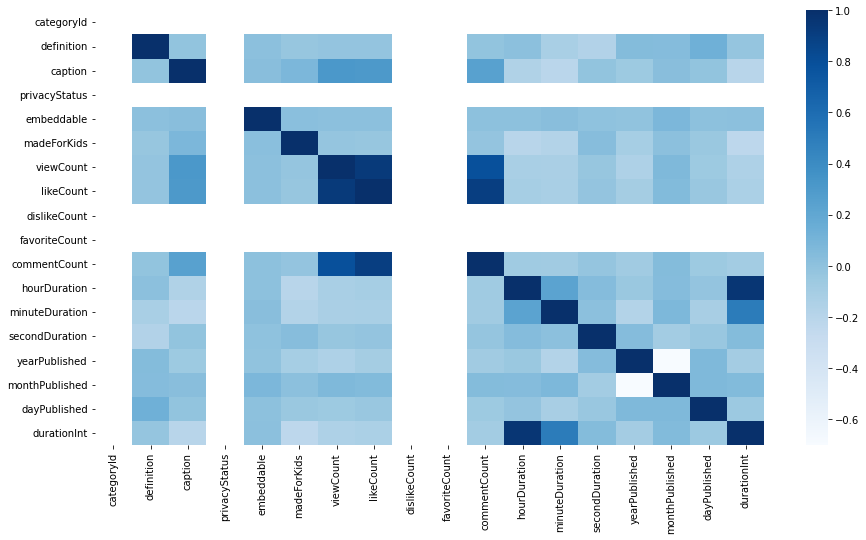

In [35]:
plt.figure(figsize=(15,8))
heatmap_df_normal_preprocess = df_normal_preprocessed[['viewCount','likeCount','dislikeCount','commentCount', 'favoriteCount']]
corr = df_normal_preprocessed.corr()
sns.heatmap(corr, cmap='Blues')

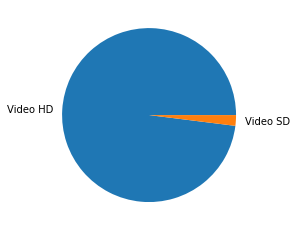

In [36]:
# plt.figure(figsize=(8,16))

# plt.scatter(df_normal_preprocessed['definition'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

hd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
sd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([hd_videos.shape[0], sd_videos.shape[0]])
mylabel = ['Video HD', 'Video SD']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

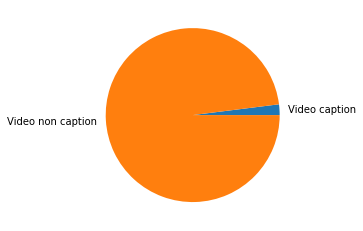

In [37]:
# plt.scatter(df_normal_preprocessed['caption'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Caption')
# plt.xlabel('Caption')
# plt.ylabel('View count')

df_normal['caption'].unique()

caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([caption_videos.shape[0], non_caption_videos.shape[0]])
mylabel = ['Video caption', 'Video non caption']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

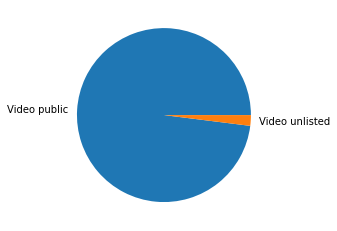

In [38]:
# plt.scatter(df_normal_preprocessed['privacyStatus'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

df_normal['privacyStatus'].unique()

public_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
unlisted_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([public_videos.shape[0], unlisted_videos.shape[0]])
mylabel = ['Video public', 'Video unlisted']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

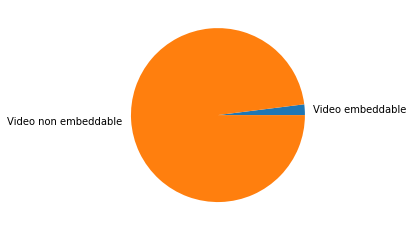

In [39]:
# plt.scatter(df_normal_preprocessed['embeddable'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['embeddable'].unique()

embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([embeddable_videos.shape[0], non_embeddable_videos.shape[0]])
mylabel = ['Video embeddable', 'Video non embeddable']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

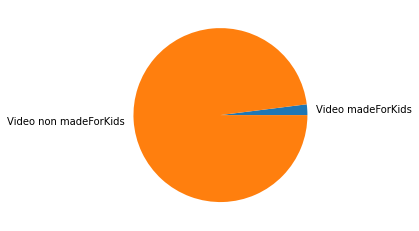

In [40]:
# plt.scatter(df_normal_preprocessed['madeForKids'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['madeForKids'].unique()
# test = df_normal[df_normal['madeForKids']==False]
madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([madeForKids_videos.shape[0], non_madeForKids_videos.shape[0]])
mylabel = ['Video madeForKids', 'Video non madeForKids']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

#### Convert text to vector IF TDF

In [41]:
def convertIfTdf(df, column, stopwords):
    data_train = df[column]
    data_train = removeStopword(data_train, stopwords)

    module_count_vector = TfidfVectorizer(stop_words=stopwords)
    model_rf_preprocess = Pipeline([('vect', module_count_vector),
                        ('tfidf', TfidfTransformer()),
                        ])
    # Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận 
    # Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array 
    data_preprocessed = module_count_vector.fit_transform(data_train)

    print(f"\nNumber of words in the dictionary: {len(module_count_vector.vocabulary_)}")
    print(f"Data size after processing: {data_preprocessed.shape}")
    print(f"View the words in the dictionary: {module_count_vector.vocabulary_}")
    print(type(data_preprocessed))
    return data_preprocessed


In [42]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nhạc', 'âm', 'hát', 'tuyển', 'tập', 'bài', 'những', 'ca', ' x ', 'ft','feat']
X = convertIfTdf(df_normal_preprocessed,'title', stopwords)
print(type(X))


Number of words in the dictionary: 1654
Data size after processing: (808, 1654)
View the words in the dictionary: {'trẻ': 1315, 'remix': 1054, '2022': 56, 'hay': 513, 'nhất': 913, 'hiện': 526, 'nay': 843, 'edm': 422, 'tiktok': 1256, 'orinn': 968, 'lk': 702, 'mới': 834, 'liên': 699, 'khúc': 636, 'chọn': 278, '129': 44, 'bxh': 179, 'top': 1274, '20': 53, 'bản': 197, '40': 69, 'hàng': 548, 'triệu': 1288, 'view': 1405, 'bảng': 198, 'xếp': 1500, 'hạng': 573, 'hits': 520, 'say': 1087, 'thì': 1212, 'cứ': 357, 'yêu': 1511, 'bỏ': 210, 'đi': 1527, 'thất': 1231, 'tình': 1350, 'cấm': 343, 'nghe': 853, 'về': 1452, 'đêm': 1548, 'ngày': 874, 'đầu': 1571, 'tiên': 1260, '30': 66, 'lofi': 706, 'chill': 227, '128': 43, '15': 47, 'mix': 786, 'nhẹ': 917, 'nhàng': 900, 'cực': 359, 'gây': 497, 'nghiện': 855, 'đế': 1582, 'vương': 1441, 'ai': 115, 'chung': 237, 'được': 1564, 'mãi': 802, '2021': 55, '29': 64, 'không': 635, 'trọn': 1318, 'vẹn': 1449, 'nữa': 956, 'nonstop': 926, 'bass': 143, 'mạnh': 817, 'việt':

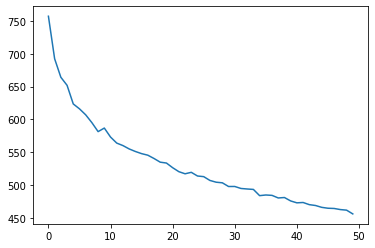

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
loss = []
for i in range(50):
    i = i + 1
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    loss.append(kmeans.inertia_)
plt.plot(range(50), loss)

In [44]:
clustering = KMeans(n_clusters=10,init='k-means++', random_state=0).fit(X)
clustering.cluster_centers_

array([[0.00138788, 0.00302744, 0.00119773, ..., 0.00222058, 0.0016191 ,
        0.00172005],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [45]:
label = clustering.labels_
print(label.shape)
for i in label:
    print(i)

(808,)
4
1
4
2
2
6
1
4
6
2
2
4
3
3
0
3
2
4
1
4
7
1
4
6
1
1
1
2
4
7
1
1
4
3
4
1
0
1
4
1
1
3
1
7
4
1
3
4
4
1
3
4
1
1
1
1
4
1
4
2
1
1
1
1
4
2
4
1
3
2
4
7
4
4
4
4
4
4
1
1
4
1
0
1
1
0
4
4
7
4
1
1
1
4
3
1
1
1
1
4
1
4
4
7
1
4
4
7
1
2
1
1
4
4
2
4
4
0
1
1
1
1
1
4
7
1
4
1
1
1
4
1
2
1
2
2
2
1
2
1
3
2
4
4
1
1
4
1
2
2
1
4
1
1
4
2
2
4
4
1
2
4
1
3
1
2
1
1
2
4
7
2
4
2
7
4
2
4
2
4
7
1
4
1
7
7
6
3
6
2
4
4
3
4
4
0
2
4
2
6
4
4
1
1
4
4
4
1
3
4
7
2
6
7
2
0
4
3
7
4
3
2
2
4
2
3
7
4
4
2
4
4
0
4
3
2
2
1
0
4
7
4
3
4
3
2
2
4
4
1
0
1
2
0
7
4
2
1
3
3
1
2
3
7
1
1
3
4
2
4
4
3
2
1
6
0
1
2
1
2
0
3
2
2
3
3
3
0
3
1
3
2
2
2
2
3
2
7
1
0
6
4
3
3
7
3
0
2
0
2
0
8
0
0
5
0
0
0
0
5
5
0
0
2
2
5
5
0
5
5
7
5
5
5
5
5
0
0
5
5
2
2
5
0
2
5
0
5
5
5
0
5
0
2
0
0
7
2
0
2
0
0
0
0
5
2
2
5
5
2
5
2
2
5
5
0
2
2
0
0
2
5
0
5
5
2
0
2
0
0
7
2
5
2
2
0
2
2
0
2
5
5
0
5
2
2
5
7
5
8
5
2
0
5
5
0
5
2
2
5
5
2
0
0
5
5
2
0
0
5
5
5
2
2
2
2
2
0
0
5
5
0
5
2
5
0
2
5
0
5
0
2
0
2
2
0
2
5
2
0
8
7
0
0
0
2
2
2
2
0
2
2
2
5
2
0
2
2
5
2
3
2
2
2
2
8
0
2
8
0
5
0
0
5
5
6
0

In [46]:
temp_df = df_normal_preprocessed.assign(label=label)
temp_df = temp_df.assign(topics = listTopics)
temp_df.info()

for i in range(len(np.unique(label))):
    print(i)
    filter_df = temp_df[label==i]
    filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 1292
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    808 non-null    object 
 1   publishAt             808 non-null    object 
 2   title                 808 non-null    object 
 3   description           808 non-null    object 
 4   channelTitle          808 non-null    object 
 5   tags                  808 non-null    object 
 6   categoryId            808 non-null    int64  
 7   defaultAudioLanguage  808 non-null    object 
 8   duration              808 non-null    object 
 9   dimension             808 non-null    object 
 10  definition            808 non-null    int64  
 11  caption               808 non-null    int64  
 12  privacyStatus         808 non-null    int64  
 13  embeddable            808 non-null    int64  
 14  madeForKids           808 non-null    int64  
 15  viewCount             

In [48]:
def drawWordCloud(df, column, stopwords):
  for i in range(len(np.unique(label))):
      
      #Extract cleaned text column
      data=df[df['label']==i][column].values
      data = removeStopword(data, stopwords)
      list_of_words=[];
      for sent in data:
        if type(sent)!=str:
          continue
        for word in sent.split():
          list_of_words.append(word)  
      final_text=" ".join(list_of_words)
      wordcloud = WordCloud(collocations=False).generate(final_text)
      plt.figure()
      title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
      plt.title(title)
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.axis("off")
      plt.show()



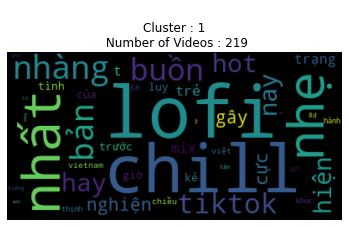

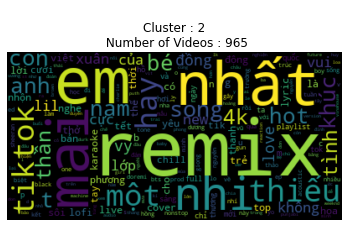

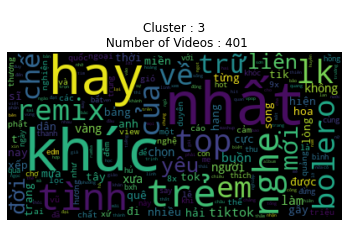

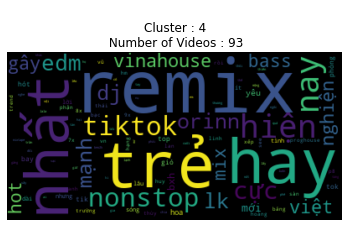

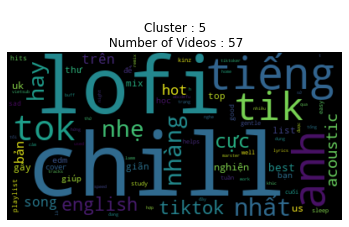

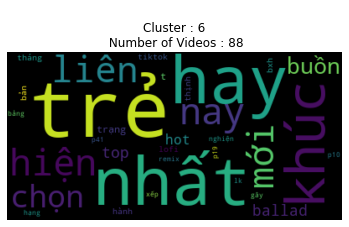

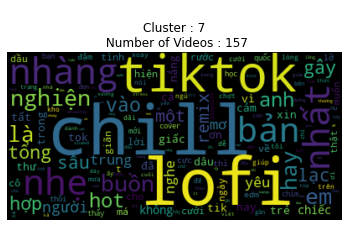

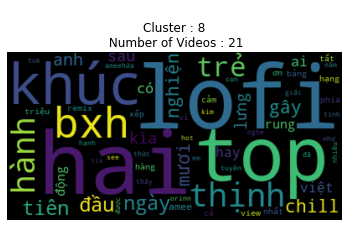

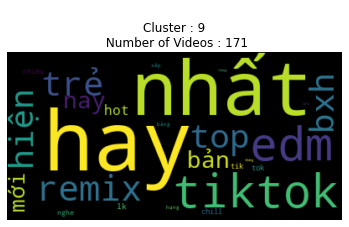

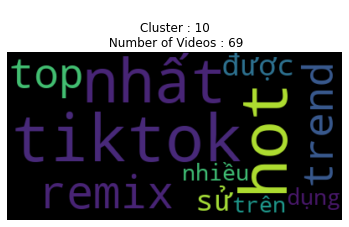

In [40]:
drawWordCloud(temp_df,'title', stopwords)

0


/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


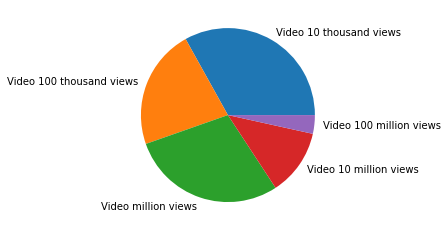

1


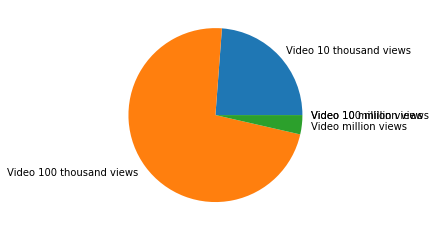

2


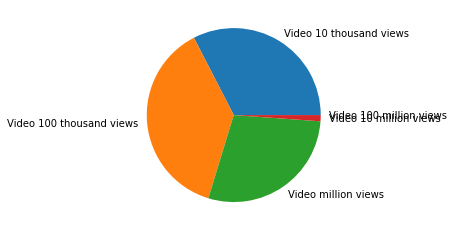

3


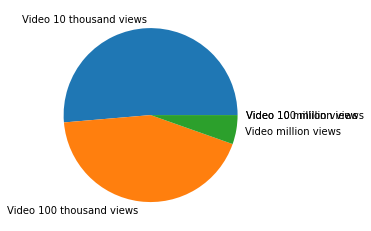

4


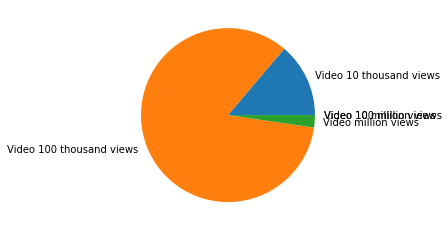

5


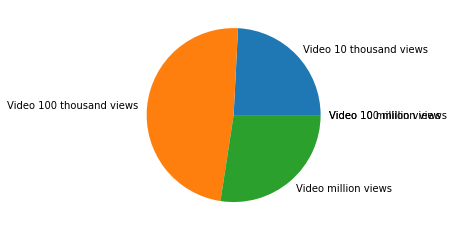

6


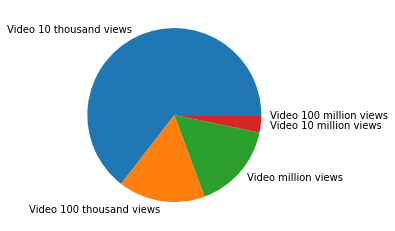

7


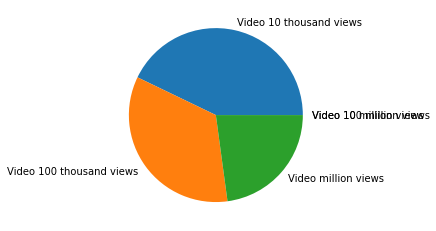

8


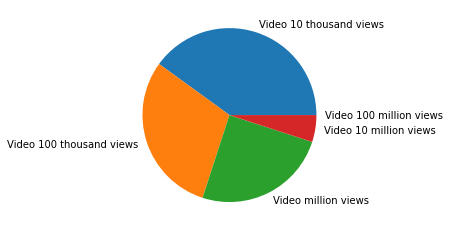

9


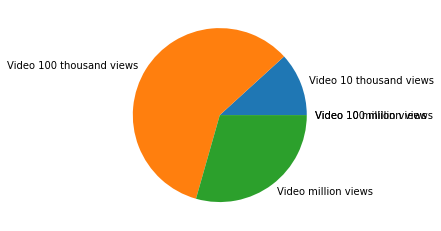

In [49]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(temp_df[temp_df['label']==i])

In [50]:
clustered_df = temp_df.groupby(['label']).sum()

In [51]:
clustered_df[['viewCount', 'likeCount', 'durationInt']]

,viewCount,likeCount,durationInt
label,,,
0,3881690369,110739827.0,490495
1,24761234,46562.0,479606
2,200381722,2089101.0,767184
3,17154339,208497.0,161671
4,26014788,63448.0,399502
5,50542161,1094643.0,329912
6,26369558,261057.0,142777
7,37929284,236620.0,134009
8,39486880,132872.0,7904


In [52]:
abnormal_cluster = temp_df[temp_df['label']==6]
# abnormal_cluster = abnormal_cluster[abnormal_cluster['label']==2]

In [53]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nhạc', 'âm', 'hát', 'tuyển', 'tập', 'bài', 'những', 'ca', ' x ', 'ft','feat']
X_abnormal = convertIfTdf(abnormal_cluster,'title', stopwords)
print(type(X_abnormal))
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0).fit(X_abnormal)
kmeans.cluster_centers_

label = kmeans.labels_

print(label.shape)
for i in label:
    print(i)
abnormal_cluster = abnormal_cluster.assign(label = label)


Number of words in the dictionary: 113
Data size after processing: (31, 113)
View the words in the dictionary: {'ngày': 71, 'đầu': 109, 'tiên': 84, 'top': 87, '30': 3, 'khúc': 48, 'trẻ': 95, 'lofi': 52, 'chill': 14, 'hàng': 41, 'triệu': 88, 'view': 101, 'hay': 37, 'nhất': 73, 'bảng': 12, 'xếp': 107, 'hạng': 43, '2022': 2, 'bản': 11, 'mix': 62, 'nhẹ': 74, 'nhàng': 72, 'cực': 24, 'gây': 32, 'nghiện': 70, 'tiktok': 83, 'hot': 40, 'sau': 78, 'lưng': 58, 'anh': 8, 'có': 20, 'ai': 7, 'kìa': 49, 'bxh': 10, 'acoustic': 6, '8x9x': 5, 'xưa': 106, 'liên': 51, 'thịnh': 81, 'hành': 42, 'mashup': 61, 'buồn': 9, 'trạng': 94, 'của': 23, 'kẻ': 50, 'lụy': 60, 'tình': 97, 'trước': 93, 'giờ': 31, 'hiện': 38, 'nay': 68, 'một': 67, 'chiếc': 15, 'lạc': 59, 'vào': 103, 'trong': 89, 'mơ': 64, 'em': 29, 'khác': 47, 'gì': 33, 'hoa': 39, 'tổng': 99, 'hợp': 45, 'nghe': 69, 'là': 55, '6h': 4, 'chiều': 16, 'vietnam': 100, 'gạt': 34, 'tàn': 96, 'ước': 112, 'hẹn': 44, 'trăm': 92, 'năm': 75, 'xin': 105, 'má': 63, 'rướ

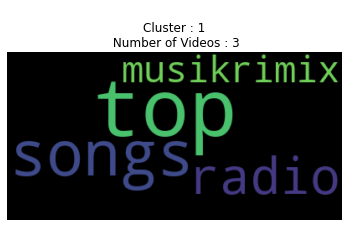

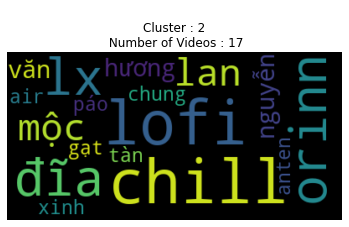

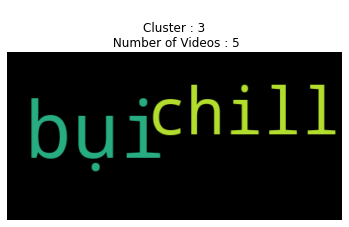

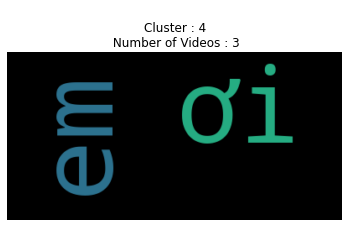

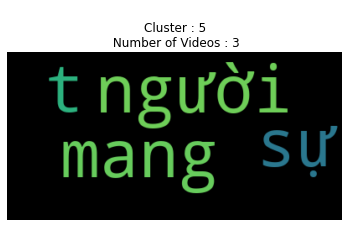

In [61]:
for i in range(len(np.unique(label))):
    
    #Extract cleaned text column
    data=abnormal_cluster[abnormal_cluster['label']==i]['channelTitle'].values
    data = removeStopword(data, stopwords)
    list_of_words=[];
    for sent in data:
      if type(sent)!=str:
        continue
      for word in sent.split():
        list_of_words.append(word)  
    final_text=" ".join(list_of_words)
    wordcloud = WordCloud(collocations=False).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


0


/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


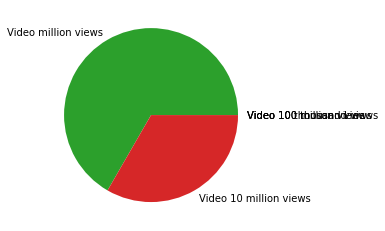

1


/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_4519/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']


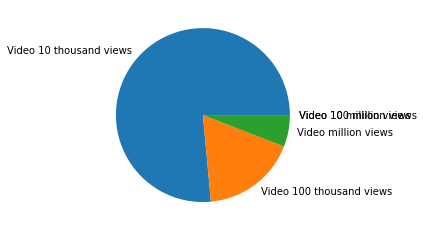

2


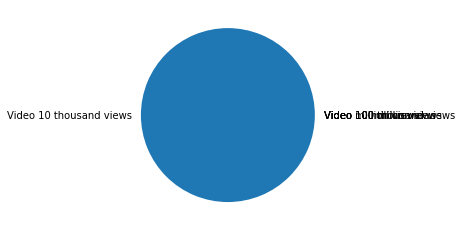

3


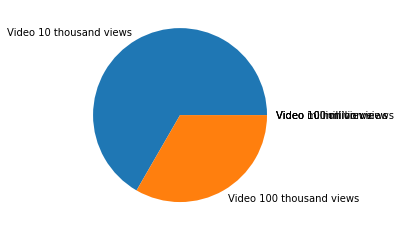

4


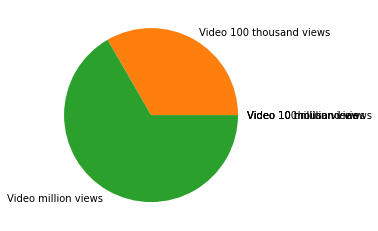

In [54]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(abnormal_cluster[abnormal_cluster['label']==i])

In [55]:
clustered_02_abnormal = abnormal_cluster[abnormal_cluster['label']!=2].sum()
clustered_02_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      26030374
likeCount      261057.0
durationInt      118842
dtype: object

In [56]:
clustered_01_abnormal = abnormal_cluster[abnormal_cluster['label']==2].sum()
clustered_01_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      339184
likeCount         0.0
durationInt     23935
dtype: object

In [57]:
for item in abnormal_cluster[abnormal_cluster['label']==0]['title']:
    print(item)

Cưa Là Đổ, Thay Lòng, Câu Hứa Chưa Vẹn Tròn - Nhạc Lofi Tik tok Nhẹ Nhàng Cực Chill 1992 Mix
Nhạc English Chill Tik Tok Nhẹ Nhàng - Những Bài Hát Tiếng Anh Cực Chill Hot Nhất Trên TikTok
Những Bài Hát Lofi Acoustic Tiếng Anh Cực Chill Hay Nhất | Nhạc Lofi Chill Tik Tok Nhẹ Nhàng 🎵


In [63]:
print(wordcloud.words_)

{'người': 1.0, 'mang': 1.0, 't': 1.0, 'sự': 1.0}
